In [20]:
%matplotlib inline 
#有了matplotlib inline 就可以省掉plt.show()了
%load_ext autoreload
%autoreload 2

from __future__ import division
from imports import *
#import pylab #使用pylab模式，可以直接使用numpy、pandas和绘图，而不需要再次引入,会配置为使用你所指定的matplotlib gui后端，还会提供一种更接近于matlab的界面
#%pylab
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle code</button>""", raw=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Toggle code

## matplotlib API

#### 虽然pandas的绘图函数能够处理许多普通的绘图任务，但如果需要自定义一些高级功能的话就必须学习matplotlib API

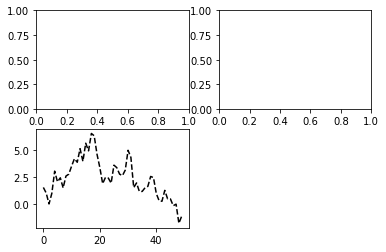

In [13]:
#matplotlib的图像都位于Figure对象中
fig = plt.figure()
#不能通过空Figure绘图，必须用add_subplot创建一个或多个subplot才行
##代码的意思是：图像是2*2的，且当前选中的是4个subplot中的第一个
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(randn(50).cumsum(),'k--')

#### fig.add_subplot所返回的对象是AxesSubplot对象，可直接调用他们的实例方法画图，在jupyter中不能显示图像

In [26]:
ax1.hist(randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*randn(30))

### subplots方法
#### 创建一个新的Figure，并返回一个含有已创建的subplot对象的Numpy数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C4FEC70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0CBE4970>]], dtype=object)

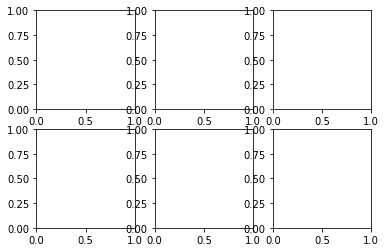

In [27]:
fig,axes = plt.subplots(2,3)
axes

#### pyplot.subplots的选项
* nrows subplot的行数
* ncols subplot的列数
* sharex 所有subplot应该使用相同的X轴刻度
* sharey 同上，为Y
* subplot_kw 用于创建各subplot的关键字字典
* **fig_kw 创建figure时的其他关键字

#### 使用subplots_adjust 方法可以修改图像之间的间距，是一个顶级函数
#### wspace和hspace用于控制宽度和高度的百分比

<Figure size 432x288 with 0 Axes>

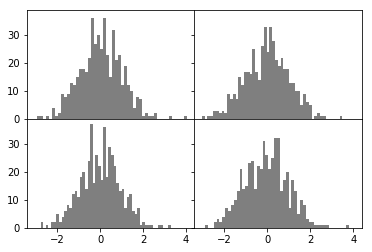

In [29]:
subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

#### 颜色、线型、标记
    颜色color='g'，可使用指定RGB值得形式，如'#000000';
    线型linestyle='dashed'
    标记marker='o'，
    三个可以写一起，如'ko--'

#### 刻度、标签和图例
* 改变x轴的刻度，set_xticks([0,250,500,750])写明了数据刻度标签；set_xtickslabels(['one','two','three'],rotation=30,fontsize='small')用任意值作为标签
* set_title:设置一个标题
* set_xlabel：为x轴设置一个名词
* 可以调用legend(loc='best')创建图例
* 数据注解：用text(x,y,'xxx')添加，x、y为坐标(x,y);或者是annotate

## pandas中的绘图函数

#### Series.plot方法（线形图）
* label 用于图例的标签
* ax 要进行绘制的matplotlib subplot对象
* style 将要传给matplotlib的风格字符串（如‘ko--’）
* alpha 图表的填充不透明度（0~1）
* kind 可以是line、bar、barh、kde
* grid 网格线，默认为False
#### DataFrame的plot的参数
* subplots 将各个DataFrame列绘制到单独的subplot中
* sharex 共用一个X轴，包括刻度和界限
* sharey
* figsize 表示图像大小的元组
* title 标题
* legend 添加一个subplot图例
* sort_columns 以字母表顺序绘制各列

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15366030>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x153B23B0>], dtype=object)

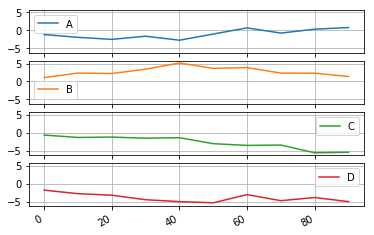

In [42]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A','B','C','D'],
              index=np.arange(0,100,10))
df.plot(kind='line',grid='True',subplots='True',sharey='True')

#### kind=‘bar’垂直柱状图，kind='barh' 水平柱状图

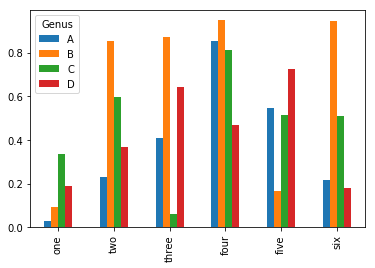

In [45]:
df = DataFrame(np.random.rand(6,4),
              index=['one','two','three','four','five','six'],
              columns=pd.Index(['A','B','C','D'],name='Genus'))
df.plot(kind='bar')

#### 设置stcked=True即可为DataFrame生成堆积柱状图



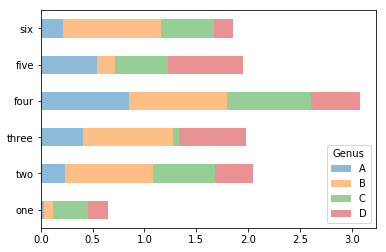

In [47]:
df.plot(kind='barh',stacked=True,alpha=0.5)

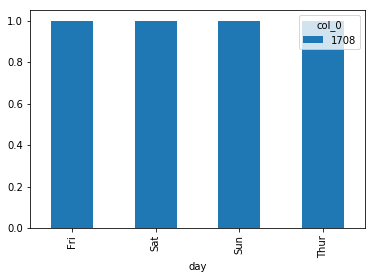

In [52]:
tips = pd.read_csv('./data/ch08/tips.csv')
party_counts = pd.crosstab(tips.day,tips.size)
party_pcts = party_counts.div(party_counts.sum(1).astype(float),axis=0)
party_pcts.plot(kind='bar',stacked=True)

#### 直方图和密度图

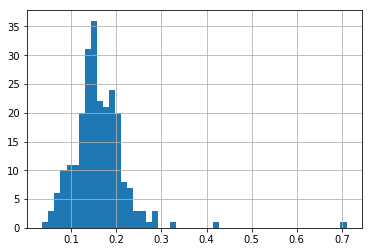

In [54]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

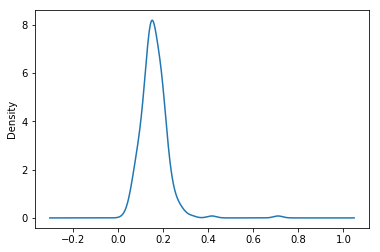

In [56]:
tips['tip_pct'].plot(kind='kde')

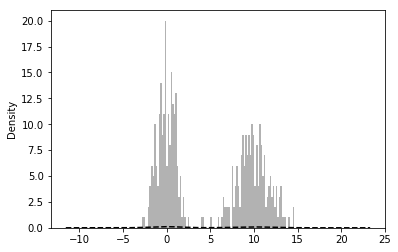

In [63]:
#产生一个均值为0，标准差为1的正态分布数据
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = Series(np.concatenate([comp1,comp2]))

values.hist(bins=100,alpha=0.3,color='k')
values.plot(kind='kde',style='k--')

#### 散点图

In [67]:
macro = pd.read_csv('./data/ch08/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

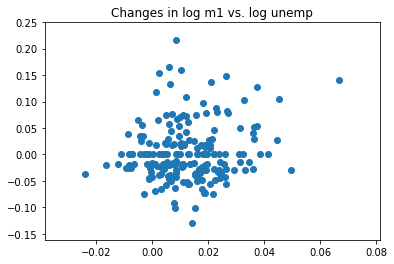

In [70]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('Changes in log %s vs. log %s'%('m1','unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x186C5ED0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18CF8870>]], dtype=object)

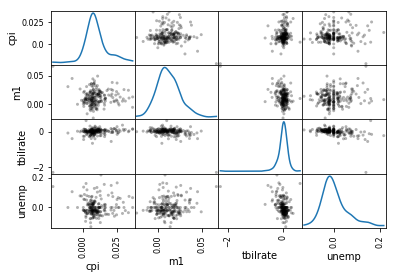

In [74]:
# 散布图矩阵
pd.plotting.scatter_matrix(trans_data,diagonal='kde',color='k',alpha=0.3)

In [79]:
data = pd.read_csv('./data/ch08/Haiti.csv')
data[['INCIDENT DATE','LATITUDE','LONGITUDE']][:10]
# 清除错误位置信息，并移除缺失分类信息
data = data[(data.LATITUDE > 18)& (data.LATITUDE < 20) & 
           (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
           & data.CATEGORY.notnull()]